# Sentiment Analysis on Customers' Reviews Using Multinomial Naive Bayes, Logistic Regression, and KNN
In this task, we will use several classification models to analyze the sentiment of reviews (given by customers on Amazon). We will classify whether a review is positive (by 1) or negative (by 0) by using the above-mentioned classifiers. 

**Steps:**
1. Importing necessary libraries and load the dataset.
2. Data Cleaning
3. Data Preprocessing
4. Texts Vectorization
5. Spliting Dataset into Training & Test sets
6. Performing the classification task by using three classification models (Multinomial Naive Bayes, Logistic Regression, and K Nearest Neighbour) independently and evaluate their performance based on Accuracy, Precission, Recall, f1-Score, Confusion Matrix, etc.
7. Report the best performing model for this classification task
8. Conclusion

**Data Source**: Dataset for this task has been collected from Kaggle

## 1. Import Libraries & Load Dataset 

In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [27]:
# Load Dataset
data=pd.read_csv(r"C:\Users\Dell\Desktop\ML Projects on Github\WiDS\NLP Sentiment Analysis from Amazon Reviews\amazon_alexa.tsv",sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## 2. Data Cleaning

### Handling NaN values in Dataset

In [31]:
# Check if there is any NaN value in Dataset
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [33]:
# As we found only one instance of NaN value in Dataset (from above), we can drop the corresponding row. It will not affect the Dataset
data = data.dropna(subset=["verified_reviews"])

In [35]:
# Check the Data Types present in Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


## 3. Data Preprocessing

In [38]:
for i in range(5):
    print(data['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [40]:
def data_processing(text):
    
#b) Convert words to lower case
    text = text.lower() 
    
#a) Tokenizing words
    text_tokens = word_tokenize(text)
    
#c) Removing Punctuations
    text = re.sub(r'[^\w\s]','',text)
    
#d) Removing Stop words
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    return " ".join(filtered_text)

In [42]:
data.verified_reviews = data['verified_reviews'].apply(data_processing)

In [44]:
# Stemming 
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [46]:
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: stemming(x))

In [48]:
for i in range(5):
    print(data['verified_reviews'].iloc[i],"\n")

love echo ! 

loved ! 

sometimes playing game , answer question correctly alexa says got wrong answers . like able turn lights away home . 

lot fun thing . 4 yr old learns dinosaurs , control lights play games like categories . nice sound playing music well . 

music 



## 4. Text Vectorization

In [51]:
X = data['verified_reviews']
Y = data['feedback']

#a) Count Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['verified_reviews'])

## 5. Split Dataset into Training and Test sets

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2519, 3961)
Size of y_train:  (2519,)
Size of x_test:  (630, 3961)
Size of y_test:  (630,)


## 6. Performing Classification Task by Using Three Classification Models


### A. Multinomial Naïve Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mnb_acc = accuracy_score(mnb_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(mnb_acc*100))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, mnb_pred))
print('\nClassification Report:\n',classification_report(y_test, mnb_pred))

Accuracy Score: 90.63%

Confusion Matrix:
 [[ 18  45]
 [ 14 553]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.29      0.38        63
           1       0.92      0.98      0.95       567

    accuracy                           0.91       630
   macro avg       0.74      0.63      0.66       630
weighted avg       0.89      0.91      0.89       630



### B. Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)

In [65]:
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(logreg_acc*100))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, logreg_pred))
print('\nClassification Report:\n',classification_report(y_test, logreg_pred))

Accuracy Score: 92.86%

Confusion Matrix:
 [[ 21  42]
 [  3 564]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.33      0.48        63
           1       0.93      0.99      0.96       567

    accuracy                           0.93       630
   macro avg       0.90      0.66      0.72       630
weighted avg       0.93      0.93      0.91       630



### C. K Nearest Neighbour

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [70]:
knn_acc = accuracy_score(knn_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(knn_acc*100))
print('\nConfusion Matrix:',confusion_matrix(y_test,knn_pred))
print('\nClassification Report:\n',classification_report(y_test,knn_pred))

Accuracy Score: 89.52%

Confusion Matrix: [[  4  59]
 [  7 560]]

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.06      0.11        63
           1       0.90      0.99      0.94       567

    accuracy                           0.90       630
   macro avg       0.63      0.53      0.53       630
weighted avg       0.85      0.90      0.86       630



## 7. Best Perforning Classification Model for this Sentiment Analysis

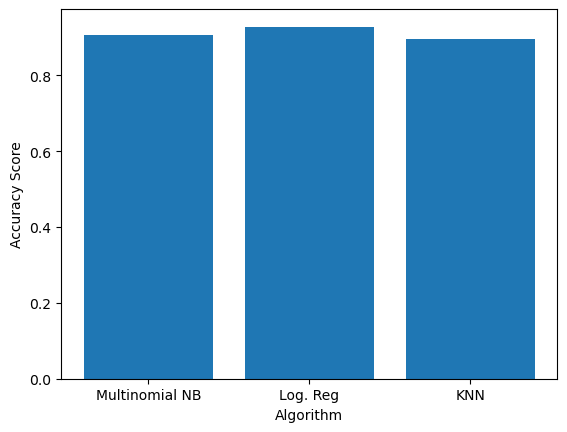

In [81]:
plt.bar(x=['Multinomial NB','Log. Reg','KNN'],height=[mnb_acc,logreg_acc,knn_acc])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

In [83]:
print('The model with the best accuracy for this sentiment analysis task is Logistic Regression')

The model with the best accuracy for this sentiment analysis task is Logistic Regression


## 8. Conclusion

From the above model performation evaluation matrices, it is obesrved that all the three models (Multinomial Naive Bayes, Logistic Regression, and K Nearest Neighbour) have performed quite well. Among these three models, Logistic Regression has performed the best (with accuracy 92.86 %) followed by Multinomial Naive Bayes (with accuracy 90.63 %) and K Nearest Neighbour (with accuracy 89.52 %)